In [1]:
import os
import sys

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

from transformers import PreTrainedTokenizerFast

sys.path.append(os.path.abspath("../src"))
# from utils import (
#     load_flores_dataset,
# )

c:\Users\ah140\anaconda3_\envs\AdvancedNLP_DL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
TOKENIZER_MODELS = ["BPE", "WordPiece", "Unigram"]
VOCAB_SIZES = [10000, 20000, 30000, 40000]
LANGUAGES = ["es", "tr"]
EVAL_DATASETS = ["flores", "massive"]

results_path = "../results/"

### Fertility

Dataset: FLORES


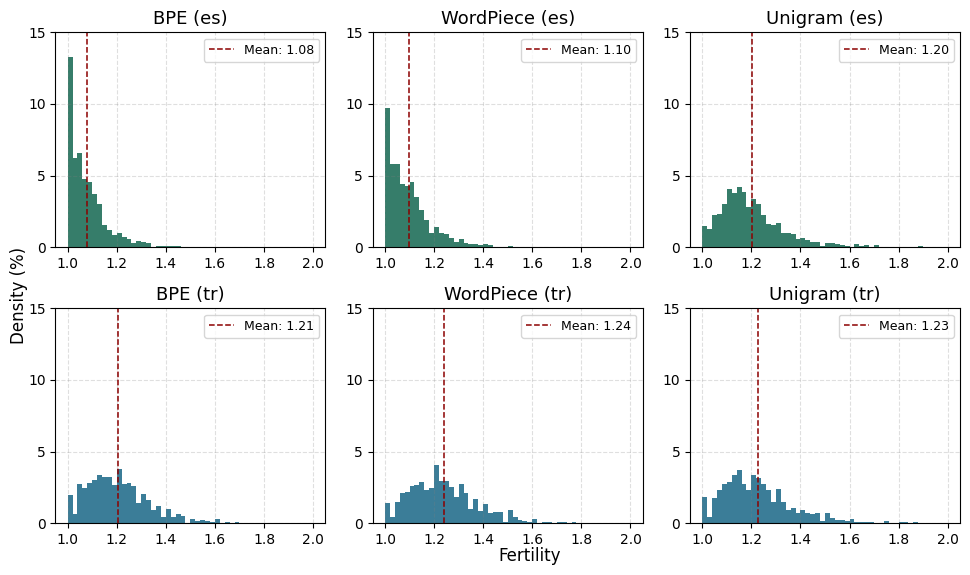

Dataset: MASSIVE


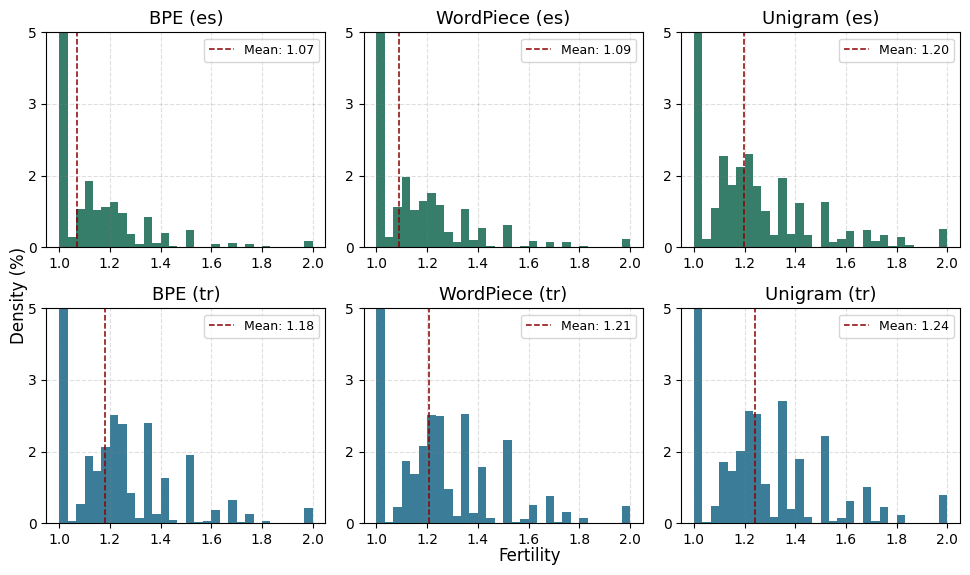

In [ ]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')

    fig, axes = plt.subplots(len(LANGUAGES), len(TOKENIZER_MODELS), figsize=(10, 6))  # Adjust the figure size for clarity
    
    for model_idx, model_name in enumerate(TOKENIZER_MODELS):
        for lang_idx, language in enumerate(LANGUAGES):
            ax = axes[lang_idx, model_idx] if len(TOKENIZER_MODELS) > 1 else axes[lang_idx]  # Adjust axes indexing
            
            results_fertility_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/eval_metrics_{dataset_name}.json')
            with open(results_fertility_path) as f:
                results_dict = json.load(f)

            # Set color based on language
            if language == 'es':
                color_l = "#367D6A"
            elif language == 'tr':
                color_l = "#3B7D98"

            ax.grid(True, linestyle='--', color='gray', alpha=0.25)

            # Annotate mean fertility
            fertility_data = results_dict['fertility']
            mean_fertility = np.mean(fertility_data)  # Calculate the mean
            ax.axvline(mean_fertility, color='darkred', linestyle='--', linewidth=1.1, label=f"Mean: {mean_fertility:.2f}")
            ax.legend(fontsize=9)

            # Adjust y-axis limits and bins
            if dataset_name == "flores":
                y_min, y_max = (0, 16)
                ax.set_ylim(0, 0.16)
                bins_d = 50
            else:
                y_min, y_max = (0, 40)
                ax.set_ylim(0, 0.4)
                bins_d = 30

            y_ticks = np.linspace(y_min, y_max, 4)  # Generate 4 evenly spaced ticks
            ax.hist(fertility_data, bins=bins_d, range=(1, 2), density=True, color=color_l)
            ax.set_yticks(y_ticks)  # Set the ticks
            ax.set_yticklabels([f'{tick:.0f}' for tick in y_ticks])  # Format the tick labels

            ax.set_title(f'{model_name} ({language})', fontsize=13)

    # Adjust layout for the figure
    fig.supxlabel('Fertility', fontsize=12, y=0.05, x=0.55)
    fig.supylabel('Density (%)', fontsize=12, x=0.03)
    plt.tight_layout()  # Adjust layout to include title

    # Save the figure if needed
    plt.savefig(f'../figures/newfertility_{dataset_name}.svg', format='svg')

    plt.show()  # Show the figure
    plt.close()  # Close the figure after displaying

### Parity

Dataset: FLORES
BPE gave the highest parity of 2.36 with index 1820
WordPiece gave the highest parity of 2.42 with index 963
Unigram gave the highest parity of 3.43 with index 236


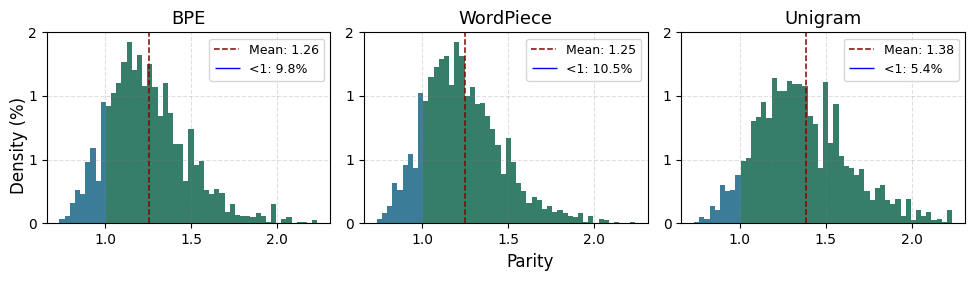

Dataset: MASSIVE
BPE gave the highest parity of 4.00 with index 6876
WordPiece gave the highest parity of 4.00 with index 6876
Unigram gave the highest parity of 7.00 with index 15083


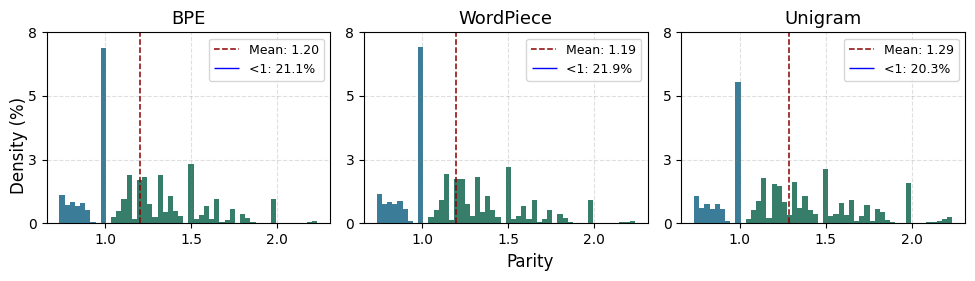

In [6]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    axes = axes.flatten()
    for i, model_name in enumerate(TOKENIZER_MODELS):
        results_parity_path = os.path.join(results_path, f'tr_{model_name}_vs40000/parity_{dataset_name}.json')
        with open(results_parity_path) as f:
            results_dict = json.load(f)

        # Track the data point with the highest parity
        max_parity = max(results_dict['parity'])
        idx = np.argmax(results_dict['parity'])
        print(f'{model_name} gave the highest parity of {max_parity:.2f} with index {idx}')
        
        # Calculate histogram data
        bin_edges = np.linspace(0.75, 2.25, 50 + 1)
        counts, edges = np.histogram(results_dict['parity'], bins=bin_edges, density=True)

        colors = ["#3B7D98" if (edge < 1) else "#367D6A" for edge in edges[:-1]]   ##367D6A

        # Plot the histogram using bar to allow custom colors
        axes[i].bar(edges[:-1], counts, width=0.03, color=colors)
        axes[i].set_title(f"{model_name}", fontsize=13)
        axes[i].grid(True, linestyle='--', color='gray', alpha=0.25)
        
        below_one = np.sum(np.array(results_dict['parity']) < 1) / len(results_dict['parity']) * 100
        
        mean_parity = np.mean(results_dict['parity'])  # Calculate the mean
        axes[i].axvline(mean_parity, color='darkred', linestyle='--', linewidth=1.1, label=f"Mean: {mean_parity:.2f}")
        
        axes[i].legend(
            handles=[
                plt.Line2D([0], [0], color='darkred', linestyle='--', linewidth=1.1),  # Line for mean
                plt.Line2D([0], [0], marker='_', color="blue", linestyle='None', markersize=18)  # Green par symbol for below 1 percentage
            ],
            labels=[f"Mean: {mean_parity:.2f}", f"<1: {below_one:.1f}%"],
            fontsize=9,
            loc='upper right'
        )
        
        if dataset_name == "flores":
            ymin, y_max = 0, 2.2
        else:
            ymin, y_max = 0, 8
        axes[i].set_ylim(ymin, y_max)
        
        # Generate and set y-axis ticks
        y_ticks = np.linspace(ymin, y_max, 4)  # Generate 4 evenly spaced ticks
        axes[i].set_yticks(y_ticks)  # Set the ticks
        axes[i].set_yticklabels([f'{tick:.0f}' for tick in y_ticks])  # Format the tick labels  

        # Add shared x and y-axis labels
        fig.supxlabel('Parity', fontsize=12, y=0.08, x=0.55)
        fig.supylabel('Density (%)', fontsize=12, x=0.03)

    plt.tight_layout()
    # Save the figure as an SVG file
    plt.savefig(f'../figures/newparity_{dataset_name}.svg')
    plt.show()

In [209]:
flores_es = load_flores_dataset('es')
flores_tr = load_flores_dataset('tr')

text_es = flores_es['text'][236]
text_tr = flores_tr['text'][236]

print('\n')
print(f'Spanish text: {text_es}')
print(f'Turkish text: {text_tr}')

Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).
Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).




Spanish text: se comportará igual que el agua. es transparente, tal como lo es el agua.
Turkish text: suya benzer şekilde saydam davranış sergileyecek.
